<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-22 10:23:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   263MB/s    in 0.4s    

2024-04-22 10:23:31 (263 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [37]:
!ls pizza_steak

test  train


In [38]:
!ls pizza_steak/train

pizza  steak


In [39]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 0 directories and 750 images in pizza_steak/train/steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 0 directories and 250 images in pizza_steak/test/steak


In [40]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [41]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [42]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #pizza_steak /test/pizza
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


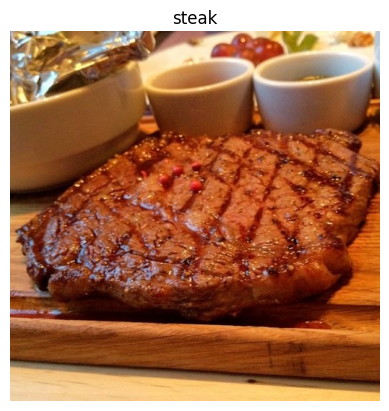

In [44]:
img = view_random_image(target_dir= 'pizza_steak/train/',
                        target_class= 'steak')

array([[[144, 142, 156],
        [160, 157, 168],
        [178, 169, 174],
        ...,
        [185, 199, 208],
        [182, 200, 210],
        [186, 206, 217]],

       [[148, 146, 159],
        [166, 163, 172],
        [183, 177, 179],
        ...,
        [184, 198, 207],
        [182, 200, 212],
        [185, 205, 216]],

       [[151, 151, 161],
        [171, 170, 176],
        [191, 186, 183],
        ...,
        [184, 198, 207],
        [182, 200, 212],
        [184, 203, 217]],

       ...,

       [[243, 211, 170],
        [243, 211, 170],
        [242, 210, 169],
        ...,
        [252, 198,  98],
        [254, 199,  99],
        [254, 200, 100]],

       [[244, 212, 173],
        [244, 212, 173],
        [243, 211, 170],
        ...,
        [248, 193,  93],
        [250, 192,  93],
        [248, 193,  93]],

       [[244, 212, 173],
        [244, 212, 173],
        [242, 210, 169],
        ...,
        [255, 197,  98],
        [255, 198,  99],
        [255, 199, 100]]], dtype=uint8)
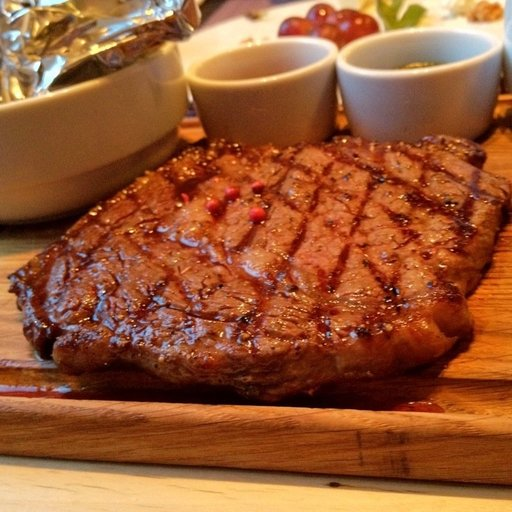

In [45]:
img

In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 173ms/step - loss: 0.5916 - accuracy: 0.6647 - val_loss: 0.4439 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4742 - accuracy: 0.7800 - val_loss: 0.4396 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4374 - accuracy: 0.7993 - val_loss: 0.4116 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3960 - accuracy: 0.8260 - val_loss: 0.3441 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3313 - accuracy: 0.8600 - val_loss: 0.3387 - val_accuracy: 0.8540


In [47]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [48]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation= 'relu'),
    tf.keras.layers.Dense(2,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])


history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 125ms/step - loss: 1.0685 - accuracy: 0.4867 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [49]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(100,activation= 'relu'),
    tf.keras.layers.Dense(1,activation= 'sigmoid')
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics = ['accuracy'])
history = model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch =len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 0.5743 - accuracy: 0.7080 - val_loss: 0.4930 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5084 - accuracy: 0.7553 - val_loss: 0.4625 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4704 - accuracy: 0.7800 - val_loss: 0.4675 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4535 - accuracy: 0.7907 - val_loss: 0.4976 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4332 - accuracy: 0.8000 - val_loss: 0.4349 - val_accuracy: 0.7940


In [50]:
len(train_data)

47

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


array([[[143,  58,  17],
        [143,  58,  17],
        [144,  59,  18],
        ...,
        [ 76,  68,  22],
        [ 67,  59,  12],
        [ 57,  51,   1]],

       [[142,  58,  14],
        [142,  58,  14],
        [143,  59,  15],
        ...,
        [ 71,  59,  17],
        [ 61,  53,   7],
        [ 51,  45,   0]],

       [[141,  57,  11],
        [142,  58,  12],
        [143,  59,  13],
        ...,
        [ 64,  50,  11],
        [ 56,  44,   4],
        [ 48,  39,   0]],

       ...,

       [[251, 189,  76],
        [252, 190,  77],
        [251, 192,  76],
        ...,
        [243, 190,  74],
        [243, 190,  74],
        [242, 189,  73]],

       [[247, 185,  72],
        [249, 187,  74],
        [251, 192,  76],
        ...,
        [244, 191,  75],
        [243, 190,  74],
        [243, 190,  74]],

       [[245, 183,  70],
        [248, 186,  73],
        [250, 191,  75],
        ...,
        [244, 191,  75],
        [244, 191,  75],
        [244, 191,  75]]], dtype=uint8)
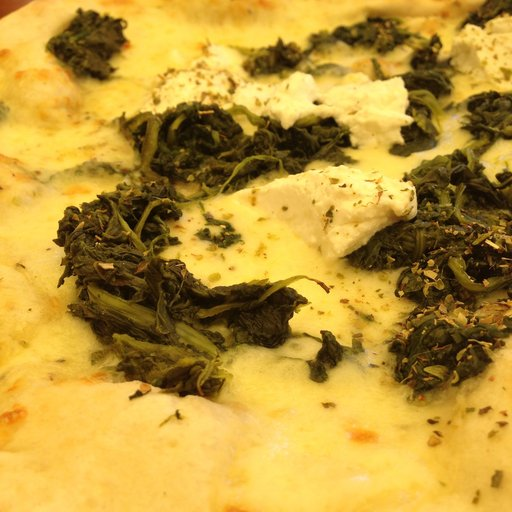

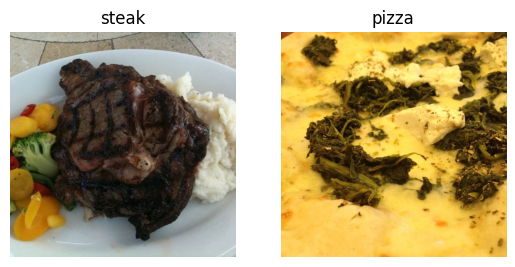

In [51]:
plt.figure()
plt.subplot(1,2,1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
view_random_image('pizza_steak/train/', 'pizza')

In [52]:
!nvidia-smi

Mon Apr 22 10:25:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0              34W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [53]:
train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test/'

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                        batch_size=32,
                                        target_size=(224,224),
                                        class_mode='binary',
                                        seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [55]:
images, labels = train_data.next()

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [57]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           padding = 'valid',
           strides = 1,
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10,3, activation= 'relu'),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])


model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy'])

history_4 = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.5545 - accuracy: 0.7293 - val_loss: 0.3808 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3727 - accuracy: 0.8480 - val_loss: 0.5259 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.2651 - accuracy: 0.9007 - val_loss: 0.5070 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.1336 - accuracy: 0.9573 - val_loss: 0.4378 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.4899 - val_accuracy: 0.8240


In [58]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 85ms/step - loss: 0.3387 - accuracy: 0.8540


[0.3387330174446106, 0.8539999723434448]

In [59]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.4899 - accuracy: 0.8240


[0.4898656904697418, 0.8240000009536743]

In [60]:
history_4.history

{'loss': [0.5545142292976379,
  0.3727051913738251,
  0.26513004302978516,
  0.13357259333133698,
  0.07535772025585175],
 'accuracy': [0.7293333411216736,
  0.8479999899864197,
  0.9006666541099548,
  0.9573333263397217,
  0.9773333072662354],
 'val_loss': [0.38079211115837097,
  0.5259203910827637,
  0.5070279836654663,
  0.4377744197845459,
  0.48986563086509705],
 'val_accuracy': [0.8259999752044678,
  0.7419999837875366,
  0.777999997138977,
  0.8220000267028809,
  0.8240000009536743]}

<Axes: >

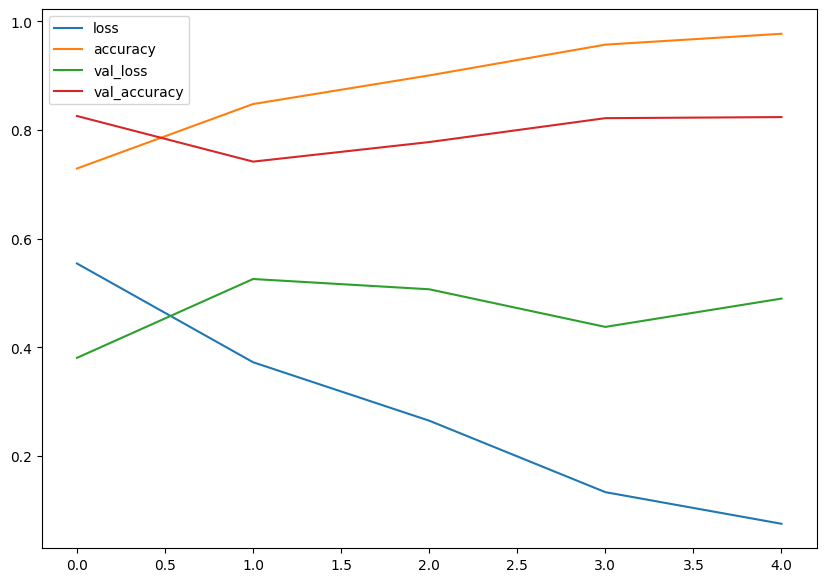

In [61]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [62]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.grid()
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.grid(axis='y')
  plt.legend()

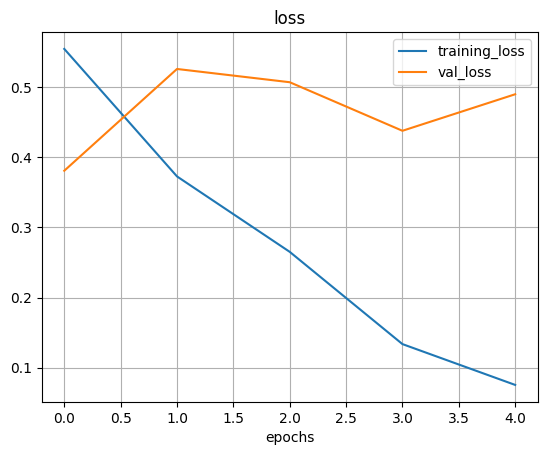

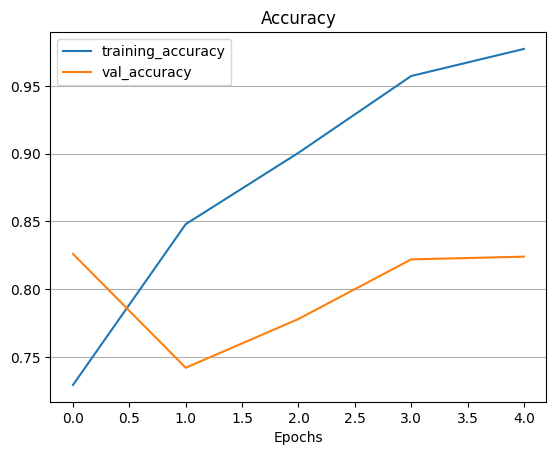

In [63]:
plot_loss_curves(history_4)

In [113]:
#Augmented dataset
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)
#normal dataset
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [111]:
print('train data augmented')
train_datagen_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                            batch_size=32,
                                                            shuffle=False,
                                                            target_size=(224,224),
                                                            class_mode = 'binary',)

print('NON-augmented train data: ')
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               shuffle=False)

IMG_SIZE = (224,224)


print('NON-augmented train data: ')
test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            shuffle=False,
                                            target_size=(224,224),
                                            class_mode='binary')

train data augmented
Found 1500 images belonging to 2 classes.
NON-augmented train data: 
Found 1500 images belonging to 2 classes.
NON-augmented train data: 
Found 500 images belonging to 2 classes.


In [99]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next()

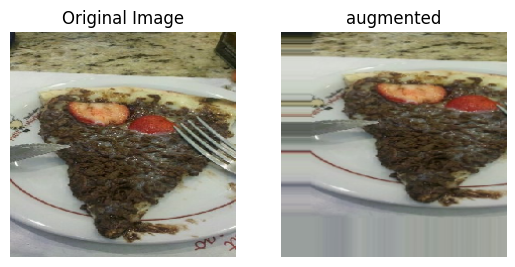

In [100]:
import random
random_number = random.randint(1,31)
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)


plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title('augmented')
plt.axis(False)
plt.show()


In [101]:
model_6 = Sequential((
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
))

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_6 = model_6.fit(train_datagen_augmented,
                        epochs=5,
                        steps_per_epoch= len(train_datagen_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 413ms/step - loss: 0.7150 - accuracy: 0.5293 - val_loss: 0.6783 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 28s 593ms/step - loss: 0.6806 - accuracy: 0.5087 - val_loss: 0.6609 - val_accuracy: 0.5820
Epoch 3/5
47/47 [==============================] - 33s 699ms/step - loss: 0.6758 - accuracy: 0.6013 - val_loss: 0.6265 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6601 - accuracy: 0.6180 - val_loss: 0.5576 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.6289 - accuracy: 0.6687 - val_loss: 0.5798 - val_accuracy: 0.6780


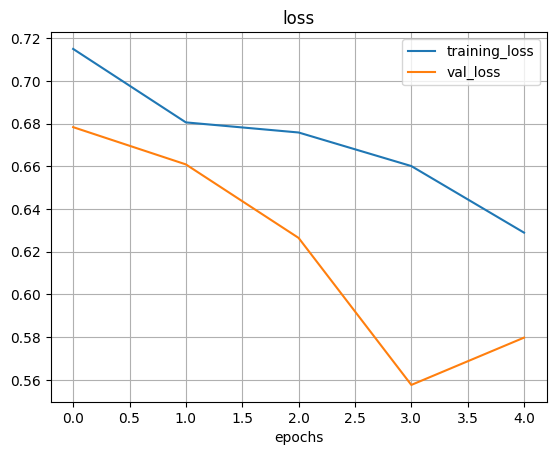

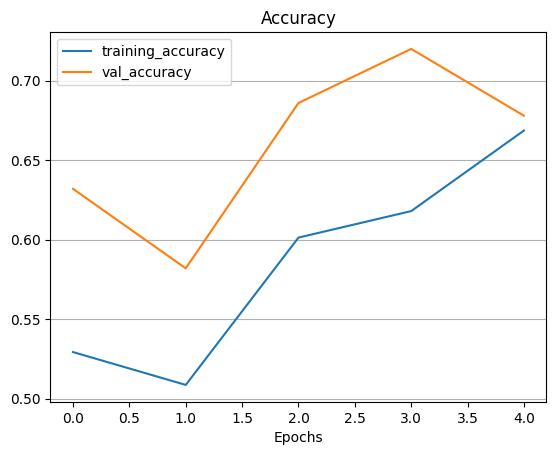

In [102]:
plot_loss_curves(history_6)

In [114]:
print('train data augmentedandshuffle')
train_datagen_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                                    batch_size=32,
                                                                                    target_size=(224,224),
                                                                                    class_mode = 'binary')

train data augmentedandshuffle
Found 1500 images belonging to 2 classes.


In [119]:
model_7 = Sequential((
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
))

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_7 = model_7.fit(train_datagen_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch= len(train_datagen_augmented_and_shuffled),
                        validation_data = test_data,
                         validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 417ms/step - loss: 0.6773 - accuracy: 0.5587 - val_loss: 0.6081 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6030 - accuracy: 0.6807 - val_loss: 0.4353 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5229 - accuracy: 0.7407 - val_loss: 0.5186 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.4881 - accuracy: 0.7733 - val_loss: 0.4553 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4860 - accuracy: 0.7727 - val_loss: 0.3623 - val_accuracy: 0.8640


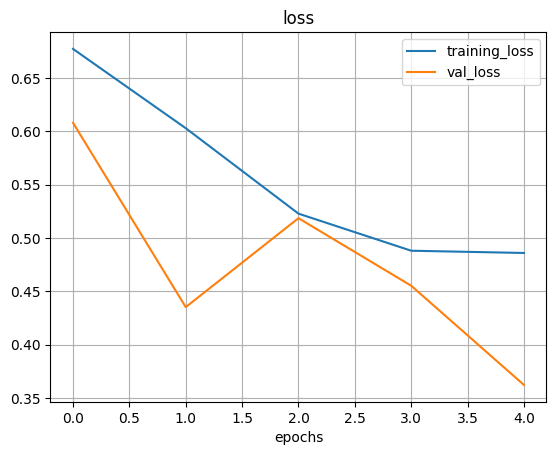

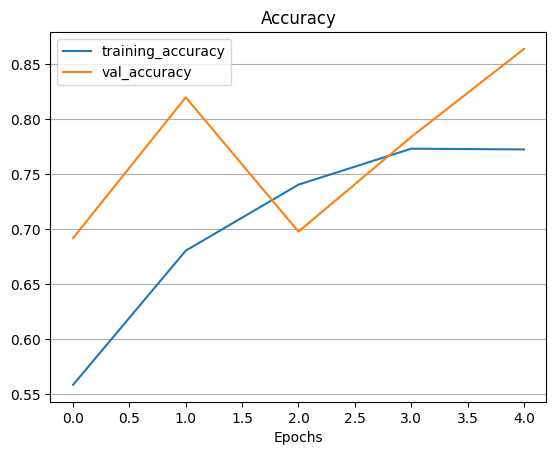

In [120]:
plot_loss_curves(history_7)

In [124]:
print(class_names)

['pizza' 'steak']


In [164]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2024-04-22 12:28:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-04-22 12:29:00 (50.4 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



<function matplotlib.pyplot.show(close=None, block=None)>

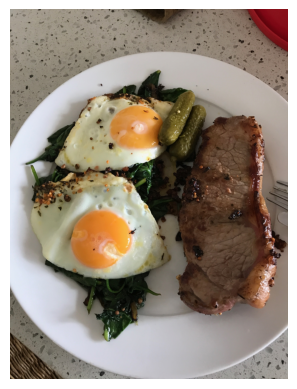

In [165]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False)
plt.show

In [166]:
steak_norm = ImageDataGenerator(rescale=1/255.)


In [167]:
steak.shape

(4032, 3024, 3)

In [168]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img =tf.image.resize(img, size= [img_shape, img_shape])
  img = img/255.
  return img

(load_and_prep_image('03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [169]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 21ms/step


In [170]:
pred

array([[0.86758703]], dtype=float32)

In [171]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [172]:
#next time try to preprocess image with image data generator
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

1/1 [==============================] - 0s 19ms/step


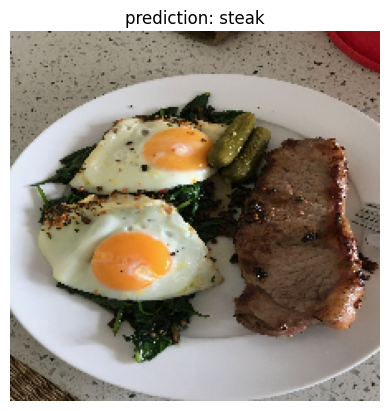

In [182]:
def pred_and_plotn(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

pred_and_plotn(model_7, "03-steak.jpeg")

In [174]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2024-04-22 12:29:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-04-22 12:29:06 (54.4 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]



<function matplotlib.pyplot.show(close=None, block=None)>

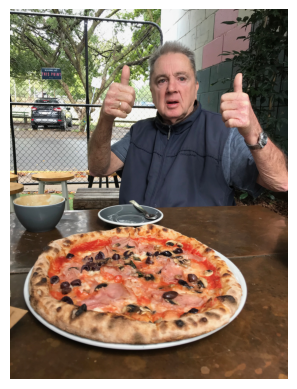

In [175]:
import matplotlib.pyplot as plt
plt.imshow(pizza)
plt.axis(False)
plt.show

In [176]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img =tf.image.resize(img, size= [img_shape, img_shape])
  img = img/255.
  return img

(load_and_prep_image('03-pizza-dad.jpeg').shape)

TensorShape([224, 224, 3])

In [177]:
pizza = load_and_prep_image('03-pizza-dad.jpeg')
pred = model_7.predict(tf.expand_dims(pizza, axis=0))

1/1 [==============================] - 0s 19ms/step


In [178]:
pred

array([[0.49608308]], dtype=float32)

In [179]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

1/1 [==============================] - 0s 27ms/step


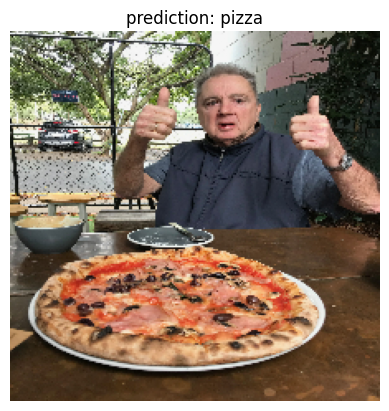

In [181]:
def pred_and_plotn(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

pred_and_plotn(model_7, "03-pizza-dad.jpeg")

In [183]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')


--2024-04-22 12:33:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  67.2MB/s    in 9.0s    

2024-04-22 12:33:47 (54.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all